In [80]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
newlist = []
import os
from os import walk
from random import shuffle
import random
import numpy as np
from sklearn import preprocessing
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4"
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**96)
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,concatenate,Input,Conv1D, MaxPooling1D,Flatten,AveragePooling2D
import pandas as pd
from tensorflow.keras.models import Model
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from scipy import interp

In [81]:

def nmodel():
    input_img = Input(shape=(50, 64,1))
    model1 = Conv2D(128, kernel_size=(2, 2), activation='relu')(input_img)
    model1 = AveragePooling2D(pool_size=(2, 2))(model1)
    model1 = Dropout(0.3)(model1)
    model1 = Conv2D(64, kernel_size=(2, 2), activation='relu')(model1)
    model1 = AveragePooling2D(pool_size=(2, 2))(model1)
    model1 = Dropout(0.3)(model1)
    model1 = Conv2D(32, kernel_size=(2, 2), activation='relu')(model1)
    model1 = AveragePooling2D(pool_size=(2, 2))(model1)
    model1 = Dropout(0.3)(model1)
    model1 = Conv2D(16, kernel_size=(2, 2), activation='relu')(model1)
    model1 = AveragePooling2D(pool_size=(2, 2))(model1)
    model1 = Dropout(0.3)(model1)
    outmodelf = Flatten()(model1)
    model = Dense(units=1024, activation='relu')(outmodelf)
    model = Dense(units=1, activation='sigmoid',)(model)
    model = Model(input_img, model)
    return model

In [83]:
def final_phase(splitnumber):
    X_train1 = pd.read_csv("/home/wsai/Repmaps/final_splits/trainsplit%sourmethod.csv"%splitnumber,header = None)
    X_train1 = np.array(X_train1)
    X_t = X_train1[:,1:]
    X_train = X_t[:,:-1]
    y_train = X_t[:,-1]
    print(y_train)
    mn = np.mean(X_train,axis = 0)
    std = np.mean(X_train,axis = 0)
    X_train = (X_train -mn)/std
    X_train_n = []
    for i in range(len(X_train)):
        x_train_n = np.reshape(X_train[i],(-1,64))
    #     print(x_train_n.shape)
        X_train_n.append(x_train_n)
    X_valid1 = pd.read_csv("/home/wsai/Repmaps/final_splits/validsplit%sourmethod.csv"%splitnumber,header = None)
    X_valid1 = np.array(X_valid1)
    X_v = X_valid1[:,1:]
    X_valid = X_v[:,:-1]
    y_valid = X_v[:,-1]
    X_valid = (X_valid -mn)/std
    X_valid_n = []
    for i in range(len(X_valid)):
        x_valid_n = np.reshape(X_valid[i],(-1,64))
    #     print(x_valid_n.shape)
        X_valid_n.append(x_valid_n)
    y_valid
    X_test1 = pd.read_csv("/home/wsai/Repmaps/final_splits/testsplit%sourmethod.csv"%splitnumber,header = None)
    X_test1 = np.array(X_test1)
    X_te = X_test1[:,1:]
    X_test = X_te[:,:-1]
    y_test = X_te[:,-1]
    X_test = (X_test -mn)/std
    X_test_n = []
    for i in range(len(X_test)):
        x_test_n = np.reshape(X_test[i],(-1,64))
    #     print(x_test_n.shape)
        X_test_n.append(x_test_n)
    y_test
    model = nmodel()
    SGD = optimizers.SGD(lr=0.001)
    model.compile(optimizer=SGD, loss='binary_crossentropy', metrics=['accuracy'])
    X1_train = np.expand_dims(np.array(X_train_n), axis=3)
    X1_valid = np.expand_dims(np.array(X_valid_n), axis=3)
    X1_test = np.expand_dims(np.array(X_test_n), axis=3)
    model.fit(X1_train, np.array(y_train), batch_size=1, epochs=1000,validation_data=(X1_valid,np.array(y_valid)))
    y_pred_our = model.predict(X1_test)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_our)
    mean_fpr_our = np.linspace(0,1,100)
    Tpr_our = interp(mean_fpr_our, fpr, tpr)
    auc_our = metrics.auc(fpr, tpr)
#     print(auc)
#     plt.plot(fpr, tpr)
    X_train_b1 = pd.read_csv("/home/wsai/Repmaps/final_splits/trainsplit%sb1.csv"%splitnumber,header = None)
    X_train_b1 = np.array(X_train_b1)
    X_t_b1 = X_train_b1[:,1:]
    X_train_b1 = X_t_b1[:,:-1]
    mnb1 = np.mean(X_train_b1,axis = 0)
    stdb1 = np.mean(X_train_b1,axis = 0)
    X_train_b1 = (X_train_b1 -mnb1)/stdb1
    y_train_b1 = X_t_b1[:,-1]

    clf = LogisticRegression()
    b1model = clf.fit(X_train_b1,y_train_b1)
    X_test_b1 = pd.read_csv("/home/wsai/Repmaps/final_splits/testsplit%sb1.csv"%splitnumber,header = None)
    X_test_b1 = np.array(X_test_b1)

    X_te_b1 = X_test_b1[:,1:]
    X_test_b1 = X_te_b1[:,:-1]
    y_test_b1 = X_te_b1[:,-1]

    X_test_b1 = (X_test_b1 -mnb1)/stdb1
    y_predb1 = b1model.predict_proba(X_test_b1)
    len(y_predb1)
    len(y_test_b1)
    y_predb1,y_test_b1
    y_predb1[:,1]
    fprb1, tprb1, thresholdsb1 = metrics.roc_curve(y_test_b1, y_predb1[:,1])
    aucb1 = metrics.auc(fprb1, tprb1)
    mean_fpr_b1 = np.linspace(0,1,100)
    Tpr_b1= interp(mean_fpr_b1, fprb1, tprb1)
#     auc_our = metrics.auc(fpr, tpr)
#     plt.plot(fpr, tpr)
#     plt.plot(fprb1, tprb1)

    clf2 = RandomForestClassifier()
    b3model = clf2.fit(X_train_b1,y_train_b1)
    y_predb3 = b3model.predict_proba(X_test_b1)
    print(y_predb3)
    fprb3, tprb3, thresholdsb3 = metrics.roc_curve(y_test_b1, y_predb3[:,1])
    aucb3 = metrics.auc(fprb3, tprb3)
    mean_fpr_b3 = np.linspace(0,1,100)
    Tpr_b3= interp(mean_fpr_b3, fprb3, tprb3)
    print(aucb3)
    ## benchmark3
    
    ##benchmark4
    Y_b2 = pd.read_csv("/home/wsai/Repmaps/final_splits/testsplit%sb2.csv"%splitnumber,header = None)
    y_pred_b2 = np.array(Y_b2.loc[:,1])
    y_test_b2 = np.array(Y_b2.loc[:,2])
    fprb2, tprb2, thresholdsb2 = metrics.roc_curve(y_test_b2, y_pred_b2)
    aucb2 = metrics.auc(fprb2, tprb2)
    
    
#     aucb1 = metrics.auc(fprb1, tprb1)
    mean_fpr_b2 = np.linspace(0,1,100)
    Tpr_b2= interp(mean_fpr_b2, fprb2, tprb2)
    return Tpr_our,mean_fpr_our,auc_our,Tpr_b1,mean_fpr_b1,aucb1,Tpr_b2,mean_fpr_b2,aucb2,Tpr_b3,mean_fpr_b3,aucb3
#     print("ourmethod:%s"%auc)
#     print("benchmark2:%s"%aucb2)
#     print("benchmark1:%s"%aucb1)
#     plt.plot(fpr, tpr)
#     plt.plot(fprb1, tprb1)
#     plt.plot(fprb2, tprb2)
    

In [84]:
TprOur = []
FprOur = []
Auc_our = []
Tprb1 = []
Fprb1= []
Auc_b1 = []
Tprb2 = []
Fprb2 = []
Aucb2 = []
Tprb3 = []
Fprb3 = []
Aucb3 = []
for i in range(1,11):
    
    Tpr_our,mean_fpr_our,auc_our,Tpr_b1,mean_fpr_b1,aucb1,Tpr_b2,mean_fpr_b2,aucb2,Tpr_b3,mean_fpr_b3,aucb3 = final_phase(i)
    TprOur.append(Tpr_our)
    FprOur.append(mean_fpr_our)
    Auc_our.append(auc_our)
    Tprb1.append(Tpr_b1)
    Fprb1.append(mean_fpr_b1)
    Auc_b1.append(aucb1)
    Tprb2.append(Tpr_b2)
    Fprb2.append(mean_fpr_b2)
    Aucb2.append(aucb2)
    Tprb3.append(Tpr_b3)
    Fprb3.append(mean_fpr_b3)
    Aucb3.append(aucb3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 60 samples, validate on 16 samples
Epoch 1/1000
60/60 [==============================] - 2s 30ms/sample - loss: 0.7107 - acc: 0.4167 - val_loss: 0.7002 - val_acc: 0.6250
Epoch 2/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.7004 - acc: 0.5333 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 3/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6984 - acc: 0.5500 - val_loss: 0.6887 - val_acc: 0.6250
Epoch 4/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6900 - acc: 0.5833 - val_loss: 0.6840 - val_acc: 0.6875
Epoch 5/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6876 - acc: 0.6000 - val_loss: 0.6801 - val_acc: 0.6875
Epoch 6/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6806 - acc: 0.6167 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.62 0.38]
 [0.74 0.26]
 [0.42 0.58]
 [0.66 0.34]
 [0.21 0.79]
 [0.37 0.63]
 [0.75 0.25]
 [0.8  0.2 ]
 [0.86 0.14]
 [0.2  0.8 ]
 [0.97 0.03]
 [0.04 0.96]
 [0.56 0.44]
 [0.2  0.8 ]
 [0.81 0.19]
 [0.01 0.99]
 [0.93 0.07]
 [0.02 0.98]
 [0.02 0.98]
 [0.21 0.79]
 [0.01 0.99]
 [0.57 0.43]
 [0.31 0.69]
 [0.01 0.99]
 [0.2  0.8 ]]
0.7233333333333334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 63 samples, validate on 15 samples
Epoch 1/1000
63/63 [==============================] - 2s 29ms/sample - loss: 0.6873 - acc: 0.6032 - val_loss: 0.6869 - val_acc: 0.6667
Epoch 2/1000
63/63 [==============================] - 0s 7ms/sample - loss: 0.6857 - acc: 0.5873 - val_loss: 0.6822 - val_acc: 0.6667
Epoch 3/1000
63/63 [==============================] - 0s 7ms/sample - loss: 0.6777 - acc: 0.6032 - val_loss: 0.6773 - val_acc: 0.6667
Epoch 4/1000
63

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.06 0.94]
 [0.77 0.23]
 [0.86 0.14]
 [0.48 0.52]
 [0.42 0.58]
 [0.77 0.23]
 [0.82 0.18]
 [0.91 0.09]
 [0.04 0.96]
 [0.06 0.94]
 [0.06 0.94]
 [0.15 0.85]
 [0.61 0.39]
 [0.06 0.94]
 [0.12 0.88]
 [0.01 0.99]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.12 0.88]
 [0.26 0.74]
 [0.01 0.99]]
0.9086538461538461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 60 samples, validate on 14 samples
Epoch 1/1000
60/60 [==============================] - 2s 31ms/sample - loss: 0.6911 - acc: 0.5833 - val_loss: 0.6880 - val_acc: 0.6429
Epoch 2/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6879 - acc: 0.6000 - val_loss: 0.6838 - val_acc: 0.6429
Epoch 3/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6840 - acc: 0.6333 - val_loss: 0.6802 - val_acc: 0.6429
Epoch 4/1000
60/60 [==============================] - 0s 7ms/sample - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.54 0.46]
 [0.71 0.29]
 [0.59 0.41]
 [0.31 0.69]
 [0.37 0.63]
 [0.55 0.45]
 [0.42 0.58]
 [0.75 0.25]
 [0.2  0.8 ]
 [0.02 0.98]
 [0.32 0.68]
 [0.33 0.67]
 [0.   1.  ]
 [0.01 0.99]
 [0.11 0.89]
 [0.32 0.68]
 [0.   1.  ]
 [0.26 0.74]
 [0.08 0.92]
 [0.11 0.89]
 [0.23 0.77]
 [0.01 0.99]]
0.9316239316239316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 60 samples, validate on 14 samples
Epoch 1/1000
60/60 [==============================] - 2s 33ms/sample - loss: 0.6883 - acc: 0.6167 - val_loss: 0.6821 - val_acc: 0.6429
Epoch 2/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6828 - acc: 0.6667 - val_loss: 0.6781 - val_acc: 0.6429
Epoch 3/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.6771 - acc: 0.6333 - val_loss: 0.6734 - val_acc: 0.6429
Epoch 4/1000
60/60 [==============================] - 0s 7ms/sa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.92 0.08]
 [0.76 0.24]
 [0.03 0.97]
 [0.92 0.08]
 [0.7  0.3 ]
 [0.47 0.53]
 [0.66 0.34]
 [0.25 0.75]
 [0.43 0.57]
 [0.82 0.18]
 [0.76 0.24]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.03 0.97]
 [0.64 0.36]
 [0.04 0.96]
 [0.05 0.95]
 [0.01 0.99]
 [0.87 0.13]
 [0.   1.  ]
 [0.29 0.71]
 [0.78 0.22]
 [0.86 0.14]
 [0.1  0.9 ]
 [0.04 0.96]
 [0.02 0.98]]
0.7926136363636364
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 62 samples, validate on 13 samples
Epoch 1/1000
62/62 [==============================] - 2s 32ms/sample - loss: 0.6952 - acc: 0.4677 - val_loss: 0.6913 - val_acc: 0.8462
Epoch 2/1000
62/62 [==============================] - 0s 7ms/sample - loss: 0.6910 - acc: 0.8065 - val_loss: 0.6879 - val_acc: 0.7692
Epoch 3/1000
62/62 [==============================] - 0s 7ms/sample - loss: 0.6914 - acc: 0.7097 - val_loss: 0.6845 - val_acc:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.31 0.69]
 [0.43 0.57]
 [0.57 0.43]
 [0.19 0.81]
 [0.11 0.89]
 [0.3  0.7 ]
 [0.03 0.97]
 [0.35 0.65]
 [0.67 0.33]
 [0.85 0.15]
 [0.46 0.54]
 [0.43 0.57]
 [0.02 0.98]
 [0.2  0.8 ]
 [0.12 0.88]
 [0.09 0.91]
 [0.08 0.92]
 [0.74 0.26]
 [0.12 0.88]
 [0.02 0.98]
 [0.37 0.63]
 [0.23 0.77]
 [0.01 0.99]
 [0.45 0.55]
 [0.01 0.99]
 [0.2  0.8 ]]
0.7303030303030303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 63 samples, validate on 15 samples
Epoch 1/1000
63/63 [==============================] - 2s 32ms/sample - loss: 0.6960 - acc: 0.4444 - val_loss: 0.6928 - val_acc: 0.6000
Epoch 2/1000
63/63 [==============================] - 0s 7ms/sample - loss: 0.6880 - acc: 0.5238 - val_loss: 0.6798 - val_acc: 0.6667
Epoch 3/1000
63/63 [==============================] - 0s 7ms/sample - loss: 0.6867 - acc: 0.6032 - val_loss: 0.6679 - val_acc: 0.6667
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.32 0.68]
 [0.63 0.37]
 [0.59 0.41]
 [0.81 0.19]
 [0.03 0.97]
 [0.24 0.76]
 [0.53 0.47]
 [0.66 0.34]
 [0.21 0.79]
 [0.03 0.97]
 [0.43 0.57]
 [0.31 0.69]
 [0.37 0.63]
 [0.96 0.04]
 [0.77 0.23]
 [0.1  0.9 ]
 [0.02 0.98]
 [0.11 0.89]
 [0.77 0.23]
 [0.37 0.63]
 [0.25 0.75]
 [0.27 0.73]
 [0.25 0.75]]
0.6458333333333334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 59 samples, validate on 15 samples
Epoch 1/1000
59/59 [==============================] - 2s 34ms/sample - loss: 0.6986 - acc: 0.4407 - val_loss: 0.6949 - val_acc: 0.4667
Epoch 2/1000
59/59 [==============================] - 0s 7ms/sample - loss: 0.6914 - acc: 0.5932 - val_loss: 0.6879 - val_acc: 0.7333
Epoch 3/1000
59/59 [==============================] - 0s 7ms/sample - loss: 0.6922 - acc: 0.5932 - val_loss: 0.6817 - val_acc: 0.7333
Epoch 4/1000
59/59 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.16 0.84]
 [0.73 0.27]
 [0.88 0.12]
 [0.49 0.51]
 [0.97 0.03]
 [0.16 0.84]
 [0.47 0.53]
 [0.59 0.41]
 [0.9  0.1 ]
 [0.86 0.14]
 [0.65 0.35]
 [0.27 0.73]
 [0.43 0.57]
 [0.65 0.35]
 [0.01 0.99]
 [0.1  0.9 ]
 [0.71 0.29]
 [0.19 0.81]
 [0.84 0.16]
 [0.   1.  ]
 [0.79 0.21]
 [0.81 0.19]
 [0.63 0.37]
 [0.   1.  ]
 [0.18 0.82]
 [0.03 0.97]]
0.7242424242424242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 61 samples, validate on 13 samples
Epoch 1/1000
61/61 [==============================] - 2s 34ms/sample - loss: 0.6919 - acc: 0.5246 - val_loss: 0.6846 - val_acc: 0.7692
Epoch 2/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6881 - acc: 0.6230 - val_loss: 0.6785 - val_acc: 0.7692
Epoch 3/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6880 - acc: 0.5902 - val_loss: 0.6730 - val_acc: 0.7692
Epoch 4/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.99 0.01]
 [0.01 0.99]
 [0.29 0.71]
 [0.74 0.26]
 [0.85 0.15]
 [0.97 0.03]
 [0.93 0.07]
 [0.97 0.03]
 [0.98 0.02]
 [0.26 0.74]
 [0.87 0.13]
 [0.23 0.77]
 [0.03 0.97]
 [0.4  0.6 ]
 [0.04 0.96]
 [0.92 0.08]
 [0.05 0.95]
 [0.02 0.98]
 [0.8  0.2 ]
 [0.16 0.84]
 [0.97 0.03]
 [0.04 0.96]
 [0.71 0.29]
 [0.85 0.15]
 [0.06 0.94]]
0.7339743589743589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 61 samples, validate on 16 samples
Epoch 1/1000
61/61 [==============================] - 2s 35ms/sample - loss: 0.6931 - acc: 0.5738 - val_loss: 0.6932 - val_acc: 0.4375
Epoch 2/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6901 - acc: 0.6230 - val_loss: 0.6899 - val_acc: 0.6875
Epoch 3/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6891 - acc: 0.5902 - val_loss: 0.6866 - val_acc: 0.6875
Epoch 4/1000
61/61 [=

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[0.39 0.61]
 [0.33 0.67]
 [0.39 0.61]
 [0.8  0.2 ]
 [0.67 0.33]
 [0.79 0.21]
 [0.23 0.77]
 [0.03 0.97]
 [0.63 0.37]
 [0.45 0.55]
 [0.   1.  ]
 [0.39 0.61]
 [0.63 0.37]
 [0.   1.  ]
 [0.96 0.04]
 [0.05 0.95]
 [0.04 0.96]
 [0.09 0.91]
 [0.09 0.91]
 [0.22 0.78]
 [0.55 0.45]
 [0.11 0.89]
 [0.04 0.96]
 [0.26 0.74]]
0.7464285714285714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 61 samples, validate on 14 samples
Epoch 1/1000
61/61 [==============================] - 2s 34ms/sample - loss: 0.6901 - acc: 0.5902 - val_loss: 0.6870 - val_acc: 0.7143
Epoch 2/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6855 - acc: 0.6066 - val_loss: 0.6837 - val_acc: 0.7143
Epoch 3/1000
61/61 [==============================] - 0s 7ms/sample - loss: 0.6815 - acc: 0.6066 - val_loss: 0.6801 - val_acc: 0.7143
Epoch 4/1000
61/61 [==============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


In [85]:
def meanvalue(array):
    horizantal = [sum(c) for c in zip(*array)]
    horizantal1 = [float(pixel / len(array)) for pixel in horizantal]
    horizantal1 =  np.array(horizantal1)
    return horizantal1

In [15]:
len(FprOur[0][1:]),len(TprOur[0]),len(tprourf)

NameError: name 'tprourf' is not defined

In [ ]:
# FprOur[0] = np.insert(FprOur[0], 0, 0)
# tprourf = np.insert(tprourf, 0, 0)
# TprOur[2] = np.insert(TprOur[2], 0, 0)
# TprOur[3] = np.insert(TprOur[3], 0, 0)


In [86]:
for i in range(10):
    Tprb1[i] = np.insert(Tprb1[i], 0, 0)
    Tprb2[i] =np.insert(Tprb2[i], 0, 0)
    Tprb3[i] =np.insert(Tprb3[i], 0, 0)

    TprOur[i] = np.insert(TprOur[i], 0, 0)
# TprOur[1] = np.insert(TprOur[1], 0, 0)


In [87]:
tprourf = meanvalue(TprOur)
tprmb1 = meanvalue(Tprb1)
tprmb2 = meanvalue(Tprb2)
tprmb3 = meanvalue(Tprb3)

In [88]:
FprOur[0] = np.insert(FprOur[0],0,0)
Fprb1[0] = np.insert(Fprb1[0],0,0)
Fprb2[0] = np.insert(Fprb2[0],0,0)
Fprb3[0] = np.insert(Fprb3[0],0,0)
# plt.plot(FprOur[0][1:],TprOur[0],linestyle = '--',alpha=0.4)
# plt.plot(FprOur[0][1:],TprOur[1],linestyle = '-',alpha=0.4)
# plt.plot(FprOur[0][1:],TprOur[2],linestyle = '--',alpha=0.4)
# plt.plot(FprOur[0][1:],TprOur[3],linestyle = '--',alpha=0.4)

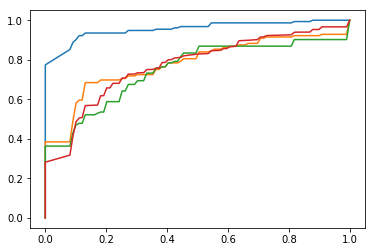

In [89]:
plt.plot(FprOur[0],tprourf,linestyle = '-')
plt.plot(Fprb1[0],tprmb1,linestyle = '-')
plt.plot(Fprb2[0],tprmb2,linestyle = '-')
plt.plot(Fprb3[0],tprmb3,linestyle = '-')

In [90]:
print("ourmethod average %s +- %s"%(np.mean(Auc_our),np.std(Auc_our)))
print("b1 average%s +- %s"%(np.mean(Auc_b1),np.std(Auc_b1)))
print("b2 average%s  +- %s"%(np.mean(Aucb2),np.std(Aucb2)))
print("b3 average%s  +- %s"%(np.mean(Aucb3),np.std(Aucb3)))

ourmethod average 0.9554793169793172 +- 0.03310876711768372
b1 average0.7783406315906316 +- 0.08241125605234427
b2 average0.7456700244200245  +- 0.09141452683657024
b3 average0.7699506465756467  +- 0.08308609366569185


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbae55884e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbae5588b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbae5588390>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbae5592240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbae5592588>,
 'means': []}

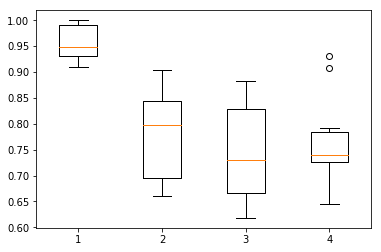

In [93]:
plt.boxplot([Auc_our,Auc_b1,Aucb2,Aucb3])

[[-0.32537162 -0.400883  ]
 [-0.37484437 -0.53112583]
 [-0.51876509  0.53686534]
 [-0.11848558  0.6410596 ]
 [-0.21293355  0.74525386]
 [-0.24891373 -0.42693157]
 [-0.15446576 -0.89580574]
 [-0.79761149  0.53686534]
 [-0.60421802 -0.63532009]
 [-0.51876509 -0.79161148]
 [-0.70316351  2.30816777]
 [-0.68517342 -0.06225166]
 [-0.77062635 -0.55717439]
 [-0.73914369 -0.76556291]
 [-0.48728243 -0.55717439]
 [-0.37934189  0.77130243]
 [ 0.27279888  3.79293598]
 [-0.70316351 -0.84370861]
 [-0.14996824 -0.58322296]
 [-0.73464617 -0.14039735]
 [-0.49177995  0.17218543]
 [ 0.16036082 -0.19249448]
 [-0.57423453 -0.83068433]
 [-0.54874857 -0.97395143]
 [ 0.30727989 -0.85673289]
 [-0.81260323 -0.06225166]
 [ 0.43920722  1.44856512]
 [-0.63719985 -0.68741722]
 [ 1.61006225  1.14900662]
 [-0.4887816   0.13311258]
 [ 0.62210647  0.62803532]
 [-0.20094016 -0.54415011]
 [ 1.29673485 -0.89580574]
 [-0.42731546 -0.59624724]
 [-0.15746411 -0.57019868]
 [ 0.65958582  0.32847682]
 [-0.04952357 -0.81766004]
 

array([0.41268331, 0.3642709 , 0.88839795, 0.3758631 , 0.60488139,
       0.37759079, 0.52699457, 0.49282781, 0.64763921, 0.57998231,
       0.41928762, 0.92765357, 0.96427341, 0.85433474, 0.83474647,
       0.59015076, 0.77816404, 0.92371798, 0.846418  , 0.46876977,
       0.86421821, 0.69863561, 0.31974997, 0.57447413, 0.86845547,
       0.79908225, 0.90125023])

0.8181818181818181


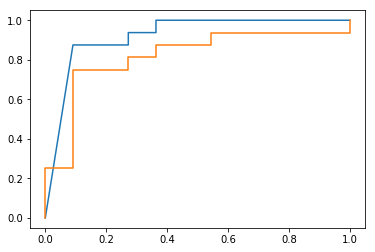

ourmethod:0.9204545454545454
benchmark2:0.6931818181818181
benchmark1:0.8181818181818181


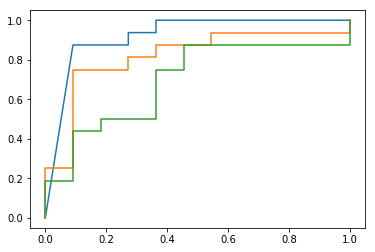

In [218]:
y_pred_b2

array([0.68128342, 0.58770707, 0.85205777, 0.5613556 , 0.81289131,
       0.65617177, 0.82137083, 0.81467203, 0.75917941, 0.68885573,
       0.62630733, 0.90415937, 0.7689928 , 0.88306177, 0.862881  ,
       0.8416419 , 0.8453389 , 0.7626022 , 0.734896  , 0.7294876 ,
       0.82609653, 0.80248606, 0.48882392, 0.8183041 , 0.81034684,
       0.5298867 , 0.83543605])

In [219]:
y_test_b2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [220]:
print(fprb2,tprb2)

[0.         0.         0.         0.09090909 0.09090909 0.18181818
 0.18181818 0.36363636 0.36363636 0.45454545 0.45454545 1.
 1.        ] [0.     0.0625 0.1875 0.1875 0.4375 0.4375 0.5    0.5    0.75   0.75
 0.875  0.875  1.    ]


TypeError: 'RocCurveDisplay' object is not iterable

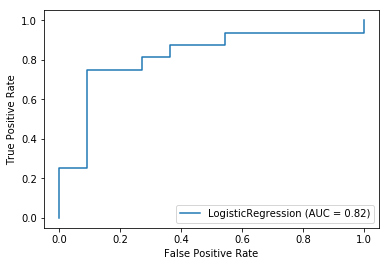

In [221]:
fprb2, tprb2, thresholdsb2 = metrics.plot_roc_curve(b1model,X_test_b1, y_test_b1)

In [329]:
X_test1 = pd.read_csv("/home/wsai/Repmaps/final_splits/testsplit%sourmethod.csv"%1,header = None)
X_test1 = np.array(X_test1)

X_te = X_test1[:,1:]

X_test = X_te[:,:-1]
X1_test = np.expand_dims(np.array(X_test_n), axis=3)

In [331]:
y_pred = model.predict(X1_test)

In [332]:
y_pred

array([[0.10887778],
       [0.10882235],
       [1.        ],
       [0.10883921],
       [0.560056  ],
       [0.10885277],
       [0.08830932],
       [0.10950565],
       [0.21305007],
       [0.10887295],
       [0.10885096],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.20230624],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.10891287],
       [1.        ]], dtype=float32)